## Steps to solve any Recursion problems
1. Write the base condition
2. Create a choice diagram
3. Write the code with the help of base condition and choice diagram

### Writing the Base Condition
1. Think of the smallest valid input and the output for the same.
   For example, to solve a knapsack problem to maximize profit, a function would take the weights, values, and the maximum capacity of the knapsack. The smallest valid case would be when there are no weights or values provided, the profit would be 0.

    ```python3
    if len(weigths) == 0 or len(values) == 0:
        return 0
    ```

### Create a choice Diagram
<div style="text-align: center;">
    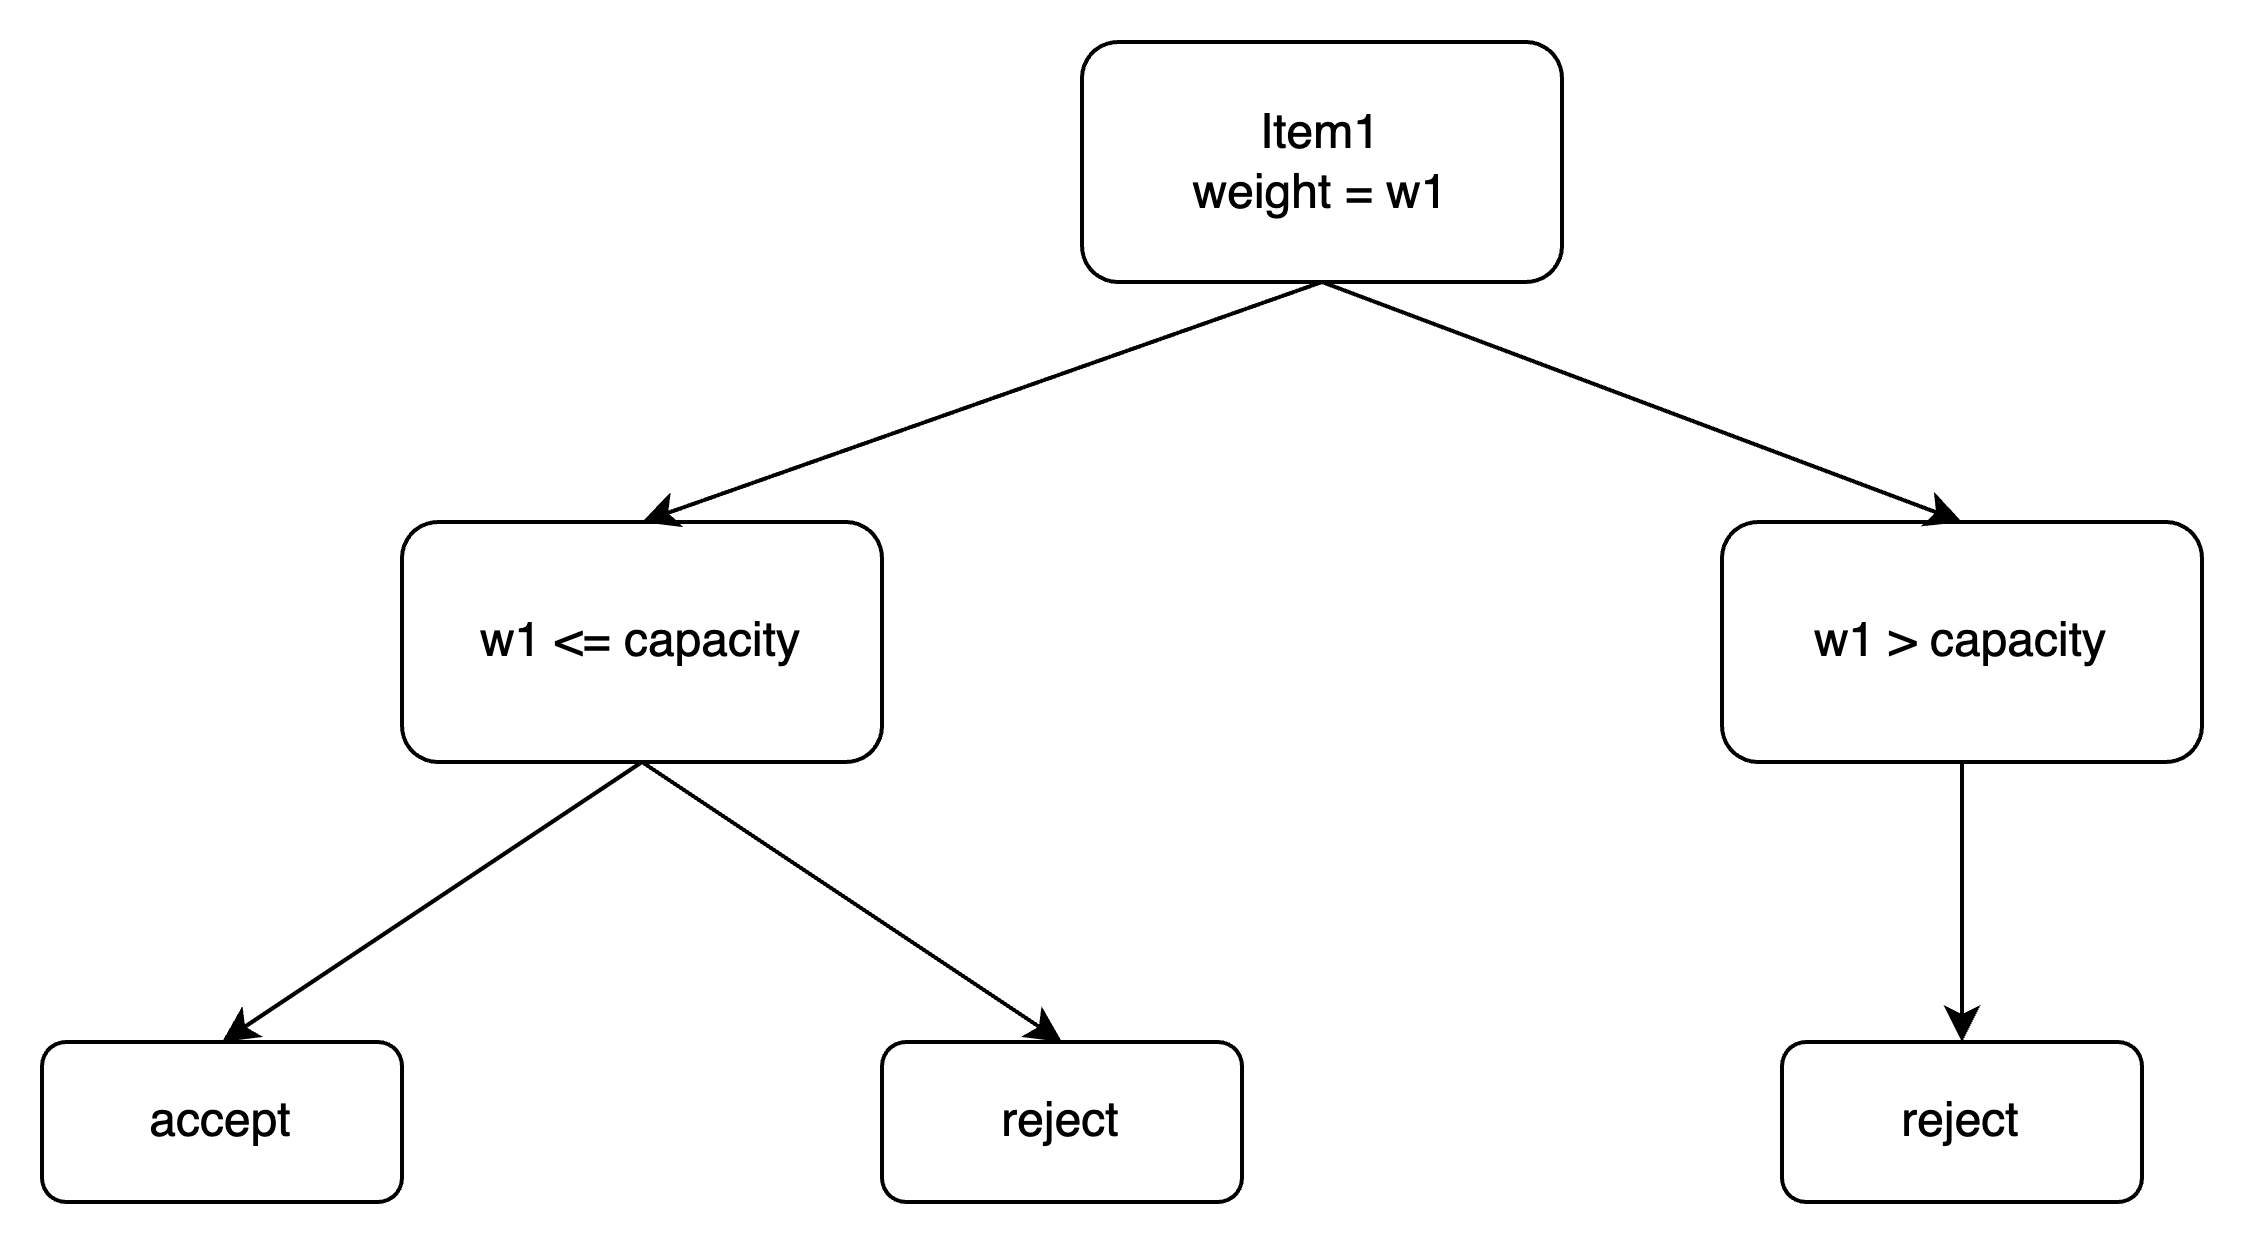
</div>




### Write the code with the help of base condition and choice diagram

In [21]:
def maximize_profit(weights: list, values: list, capacity: int) -> int:
    if len(weights) == 0 or len(values) == 0:
        return 0
    if weights[0] <= capacity:
        return max(
            values[0] + maximize_profit(weights[1:], values[1:], capacity - weights[0]),
            maximize_profit(weights[1:], values[1:], capacity),
        )
    else:
        return maximize_profit(weights[1:], values[1:], capacity)

In [22]:
weights = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
values = [10, 15, 40, 30, 50, 10, 25, 40, 60, 70]
capacity = 20
maximize_profit(weights, values, capacity)


175

### Another way to solve the above problem in more object oriented way or Array way

This method helps to convert recursive approach to top down or tabular approach that we'll see later in the notebook.

In [23]:
def maximize_profit_array(weights: list, values: list, capacity: int, n: int) -> int:
    if capacity == 0 or n == 0:
        return 0
    if weights[n] <= capacity:
        return max(
            values[n] + maximize_profit_array(weights, values, capacity - weights[n], n-1),
            maximize_profit_array(weights, values, capacity, n-1),
        )
    else:
        return maximize_profit_array(weights, values, capacity, n-1)

In [24]:
weights = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
values = [10, 15, 40, 30, 50, 10, 25, 40, 60, 70]
capacity = 20
maximize_profit_array(weights, values, capacity, 10-1)

175

### Knapsack with memoization

In [18]:
memo = {}
def maximize_profit_memo(weights: list, values: list, capacity: int, n: int) -> int:
    if n < 0:
        return 0
    if (n, capacity) in memo:
        return memo[(n, capacity)]
    if weights[n] <= capacity:
        memo[(n, capacity)] = max(
            values[n] + maximize_profit_memo(weights, values, capacity - weights[n], n-1),
            maximize_profit_memo(weights, values, capacity, n-1),
        )
    else: 
        memo[(n, capacity)] = maximize_profit_memo(weights, values, capacity, n-1)
    return memo[(n, capacity)]
        

In [19]:
weights = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
values = [10, 15, 40, 30, 50, 10, 25, 40, 60, 70]
capacity = 20
maximize_profit_memo(weights, values, capacity, 10-1)

175

### Why Memoize Based on Items Left


1. By focusing on the number of items left, we can easily define our current situation: "I have 3 items left, and my knapsack can hold 10 units.". Since we are going in order, the 3 left items will be same for all cases.

2. As you make choices about items, certain combinations of remaining items and capacity will recur. For instance, if you face the same scenario again (3 items left, 10 units capacity), you want to avoid recalculating it.

3. By storing the results of previous calculations (in memo), when you reach that same situation later, you can just look up the answer instead of redoing all the work.

